# Setup Environment 

In [1]:
# pip install tensorflow

In [2]:
# pip install keras

In [3]:
# pip install opencv-python

In [4]:
# pip install imutils

In [5]:
# pip install matplotlib

In [6]:
# pip install seaborn

In [7]:
# pip install scikit-learn

# Import Library

In [8]:
import pandas as pd
import matplotlib.pyplot as plt  
import os
from os.path import join
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization , Activation,Conv2D
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score,roc_curve,confusion_matrix 

# Preprocessing

In [9]:
import pandas as pd

# path_main = "C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v2.1\\"  # Pastikan ada tanda pemisah di akhir direktori
path_main = "../data/data_preprocessing/v2.1/"
file = path_main + "augmented_labels.csv"
df = pd.read_csv(file)
df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,ga_original_ga16-meki-png_0f30e507-35d9-440c-b...,128,128,Ga,0.0,0.0,124.4,99.6
1,ga_original_ga16-meki-png_0f30e507-35d9-440c-b...,128,128,Ga,0.0,0.0,124.4,99.6
2,ga_original_ga16-meki-png_0f30e507-35d9-440c-b...,128,128,Ga,0.0,0.0,124.4,99.6
3,ga_original_ga16-meki-png_0f30e507-35d9-440c-b...,128,128,Ga,0.0,0.0,124.4,99.6
4,ga_original_ga16-meki-png_0f30e507-35d9-440c-b...,128,128,Ga,0.0,0.0,124.4,99.6


Jumlah File C:\Users\USER-03\W\projects_skripsi\data\data_preprocessing\v2.1\Ba is  650
Jumlah File C:\Users\USER-03\W\projects_skripsi\data\data_preprocessing\v2.1\Ca is  650
Jumlah File C:\Users\USER-03\W\projects_skripsi\data\data_preprocessing\v2.1\Da is  650
Jumlah File C:\Users\USER-03\W\projects_skripsi\data\data_preprocessing\v2.1\Dha is  650
Jumlah File C:\Users\USER-03\W\projects_skripsi\data\data_preprocessing\v2.1\Ga is  650
Jumlah File C:\Users\USER-03\W\projects_skripsi\data\data_preprocessing\v2.1\Ha is  650
Jumlah File C:\Users\USER-03\W\projects_skripsi\data\data_preprocessing\v2.1\Ja is  650
Jumlah File C:\Users\USER-03\W\projects_skripsi\data\data_preprocessing\v2.1\Ka is  650
Jumlah File C:\Users\USER-03\W\projects_skripsi\data\data_preprocessing\v2.1\La is  650
Jumlah File C:\Users\USER-03\W\projects_skripsi\data\data_preprocessing\v2.1\Ma is  650
Jumlah File C:\Users\USER-03\W\projects_skripsi\data\data_preprocessing\v2.1\Na is  650
Jumlah File C:\Users\USER-03\W\

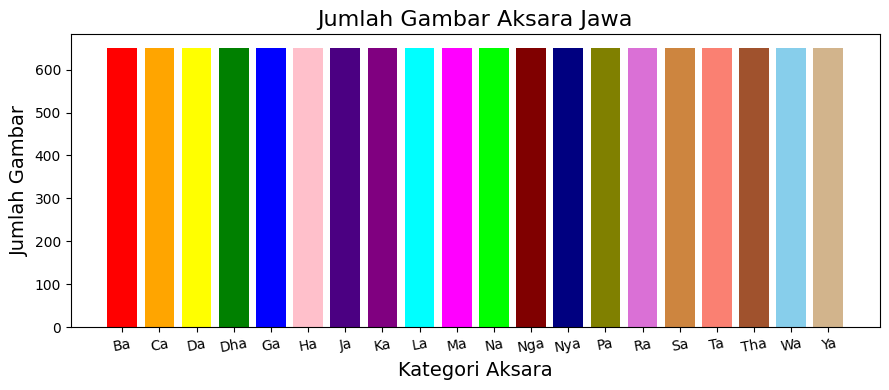

In [10]:
import matplotlib.pyplot as plt
import os
# Define an empty list
file_counts = []
def countFile(link):
    path = link
    num_files = len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])
    file_counts.append(num_files)
    print(f"Jumlah File {link} is ", num_files)
    
    
countFile("C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v2.1\\Ba")
countFile("C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v2.1\\Ca")
countFile("C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v2.1\\Da")
countFile("C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v2.1\\Dha")
countFile("C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v2.1\\Ga")
countFile("C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v2.1\\Ha")
countFile("C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v2.1\\Ja")
countFile("C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v2.1\\Ka")
countFile("C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v2.1\\La")
countFile("C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v2.1\\Ma")
countFile("C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v2.1\\Na")
countFile("C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v2.1\\Nga")
countFile("C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v2.1\\Nya")
countFile("C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v2.1\\Pa")
countFile("C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v2.1\\Ra")
countFile("C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v2.1\\Sa")
countFile("C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v2.1\\Ta")
countFile("C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v2.1\\Tha")
countFile("C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v2.1\\Wa")
countFile("C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v2.1\\Ya")

# Define the input path aksara
aksara_categories = ['Ba', 'Ca', 'Da', 'Dha', 'Ga', 'Ha', 'Ja', 'Ka', 'La', 'Ma', 'Na',
                     'Nga', 'Nya', 'Pa', 'Ra', 'Sa', 'Ta', 'Tha', 'Wa', 'Ya']

colors = ['red', 'orange', 'yellow', 'green', 'blue', 'pink', 'indigo', 'purple', 
          'cyan', 'magenta', 'lime', 'maroon', 'navy', 'olive', 'orchid', 'peru', 
          'salmon', 'sienna', 'skyblue', 'tan']  # Colors for each bar

# Create bar chart
plt.figure(figsize=(9, 4))
plt.bar(aksara_categories, file_counts, color=colors)
plt.xlabel('Kategori Aksara', fontsize=14)
plt.ylabel('Jumlah Gambar', fontsize=14)
plt.title('Jumlah Gambar Aksara Jawa', fontsize=16)
plt.xticks(fontsize=10, rotation=10)
plt.tight_layout()

# Show the plot
plt.show()


In [11]:
# import os
# import cv2
# import numpy as np
# from tensorflow.keras.utils import to_categorical
# import matplotlib.pyplot as plt

# # Define the input path and emotions
# INPUT_PATH = path_main  # Ganti dengan path ke data Anda
# EMOTIONS = ['Ha', 'Ma', 'Nga', 'Nya', 'Ra']

# # Define the target image size
# IMAGE_SIZE = (128, 128)

# def create_image_generator(input_path, emotions, image_size):
#     for index, emotion in enumerate(emotions):
#         emotion_path = os.path.join(input_path, emotion)
#         for filename in os.listdir(emotion_path):
#             image_path = os.path.join(emotion_path, filename)
#             image = cv2.imread(image_path)
            
#             # Pastikan gambar berwarna dikonversi menjadi grayscale
#             if len(image.shape) > 2 and image.shape[2] == 3:
#                 image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            
#             image = cv2.resize(image, image_size)  # Resize image
            
#             # Normalization
#             image = image.astype('float32') / 255.0
            
#             # Apply CLAHE filter
#             image_filtered = apply_clahe_filter(image)
            
#             yield image, image_filtered, index

# def load_images(input_path, emotions, image_size):
#     X, y = [], []
#     for _, image_filtered, label in create_image_generator(input_path, emotions, image_size):
#         X.append(image_filtered)
#         y.append(label)
#     X = np.array(X)
#     y = to_categorical(np.array(y))
#     return X, y

# def apply_clahe_filter(image, clip_limit=2.0, tile_size=(8, 8)):
#     # Pastikan gambar adalah grayscale dengan tipe data uint8
#     if image.dtype != np.uint8:
#         image = (image * 255).astype(np.uint8)
    
#     # Create CLAHE object
#     clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_size)
    
#     # Apply CLAHE
#     filtered_image = clahe.apply(image)
#     return filtered_image

# # Load images with CLAHE filter applied
# X, y = load_images(INPUT_PATH, EMOTIONS, IMAGE_SIZE)
# input_shape = (128, 128, 1)

# # Select one image to display
# index_to_display = 0

# # Generate a sample to check the preprocessing
# generator = create_image_generator(INPUT_PATH, EMOTIONS, IMAGE_SIZE)
# original_image, filtered_image, _ = next(generator)

# # Display the original and filtered images
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# plt.imshow(original_image)
# plt.title("Original Image")

# plt.subplot(1, 2, 2)
# plt.imshow(filtered_image)
# plt.title("Filtered Image with CLAHE")

# plt.show()


In [12]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Define the input path and aksaraJowo
INPUT_PATH = path_main  # Ganti dengan path ke data Anda
AKSARA = aksara_categories

# Define the target image size
IMAGE_SIZE = (128, 128)

def create_image_generator(input_path, aksaraJowo, image_size):
    for index, jowo in enumerate(aksaraJowo):
        aksara_path = os.path.join(input_path, jowo)
        
        for filename in os.listdir(aksara_path):
            image_path = os.path.join(aksara_path, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Baca gambar sebagai grayscale
            original_image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)  # Simpan gambar asli
            grayscale_image = image.copy()  # Simpan gambar grayscale
            image = cv2.resize(image, image_size)  # Resize image
            # Normalisasi tidak diperlukan karena gambar sudah dalam skala 0-255
            image_filtered = apply_log_and_threshold(image)
            
            yield original_image, grayscale_image, image_filtered, index


def load_images(input_path, aksaraJowo, image_size):
    X_original, X_grayscale, X_filtered, y_label = [], [], [], []
    
    for original_image, grayscale_image, image_filtered, label in create_image_generator(input_path, aksaraJowo, image_size):
        X_original.append(original_image)
        X_grayscale.append(grayscale_image)
        X_filtered.append(image_filtered)
        y_label.append(label)
        
    X_original = np.array(X_original)
    X_grayscale = np.array(X_grayscale)
    X_filtered = np.array(X_filtered)
    y_label = to_categorical(np.array(y_label))
    
    return X_original, X_grayscale, X_filtered, y_label

def apply_log_and_threshold(image, kernel_size=9, sigma=0, log_threshold=3):
    # Apply Gaussian Blur
    image_gaussian = cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)
    
    # Apply Laplacian of Gaussian (LoG)
    edges_log = cv2.Laplacian(image_gaussian, cv2.CV_64F, ksize=3)
    
    # Thresholding for Edge Detection Results
    detected_edges_log = np.zeros_like(edges_log)
    detected_edges_log[edges_log > log_threshold] = 255
    
    return detected_edges_log

# Load images with LoG filter and thresholding applied
X_original, X_grayscale, X_filtered, y_label = load_images(INPUT_PATH, AKSARA, IMAGE_SIZE)
input_shape = (128, 128, 1)

# Select one image to display
index_to_display = 0

# Display the original image, grayscale image, and filtered image
original_image = X_original[index_to_display]
grayscale_image = X_grayscale[index_to_display]
filtered_image = X_filtered[index_to_display]

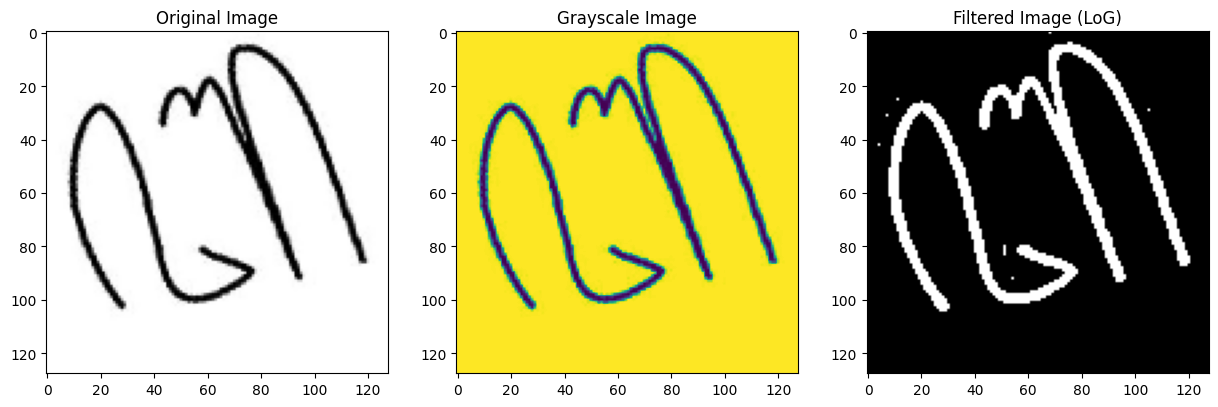

In [13]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))  # Konversi BGR ke RGB untuk tampilan yang benar

plt.subplot(1, 3, 2)
plt.title('Grayscale Image')
# plt.imshow(grayscale_image, cmap='gray')
plt.imshow(grayscale_image)

plt.subplot(1, 3, 3)
# plt.subplot(1, 3, 2)
plt.title('Filtered Image (LoG)')
plt.imshow(filtered_image, cmap='gray')

plt.show()

In [14]:
print(f"Bentuk input pada gambar: {IMAGE_SIZE}")


Bentuk input pada gambar: (128, 128)


In [15]:
# Reshape X_filtered
X_filtered_reshaped = X_filtered.reshape(-1, 128, 128, 1)
print("X_filtered shape after reshape:", X_filtered_reshaped.shape)

X_filtered shape after reshape: (13000, 128, 128, 1)


In [16]:
# Train test split 
from sklearn.model_selection import train_test_split

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_filtered_reshaped, y_label, test_size=0.3, random_state=45)

In [17]:
print("x_train shape",X_train.shape)
print("x_test shape",X_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

x_train shape (9100, 128, 128, 1)
x_test shape (3900, 128, 128, 1)
y_train shape (9100, 20)
y_test shape (3900, 20)


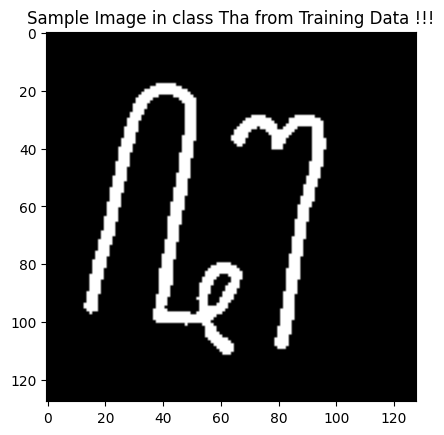

In [18]:
# Menampilkan salah satu gambar dari data pelatihan
plt.imshow(X_train[0], cmap='gray')
plt.title("Sample Image in class {} from Training Data !!!".format(AKSARA[np.argmax(y_train[0])]))
plt.axis('on')
plt.show()

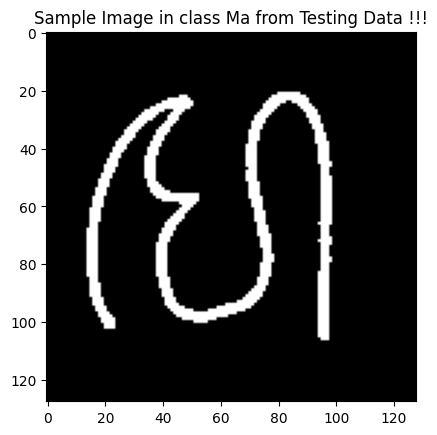

In [19]:
# Menampilkan salah satu gambar dari data pelatihan
plt.imshow(X_test[0], cmap='gray')
plt.title("Sample Image in class {} from Testing Data !!!".format(AKSARA[np.argmax(y_test[0])]))
plt.axis('on')
plt.show()

# Build the Model

## Model 1

In [20]:
# import tensorflow as tf
# from tensorflow.keras.utils import plot_model

# from tensorflow.keras.applications import VGG16

# vgg16 = tf.keras.applications.VGG16(
#     input_shape=(128, 128, 3),
#     pooling=max,
#     include_top=False,
#     weights="imagenet")
# vgg16.summary()

In [21]:
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import layers, initializers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

# Initialize Sequential model
model = Sequential()

# Add VGG16 as a layer
# model.add(vgg16)

# model = models.Sequential()

# Block 1
# model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001), input_shape=input_shape))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
# model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3)))
# model.add(Dropout(0.75))

# Block 2
# model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
# model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.75))

# Block 3
# model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
# model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
# model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.75))

# Block 4
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.75))

# Block 5
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.75))

# Flatten
model.add(Flatten())

# Dense layers
# model.add(Dense(512, activation='relu', kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.0001, seed=None)))
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.75))

# model.add(Dense(512, activation='relu', kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.0001, seed=None)))
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.75))

# Output layer
model.add(Dense(20, activation='softmax'))

# Adam optimizer with learning rate scheduling, Weight Decay, and Gradient Clipping
# opt = Adam(learning_rate=0.0001, weight_decay=1e-4, clipvalue=0.0001)
opt = tf.keras.optimizers.SGD(learning_rate=0.0001)
    
# Compile the model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

c:\Users\USER-03\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 42, 42, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 42, 42, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 42, 42, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 42, 42, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 42, 42, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 21, 21, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 21, 21, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 21, 21, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 21, 21, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 21, 21, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 21, 21, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 21, 21, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 10, 10, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 10, 10, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 10, 10, 512)    │         2,04

 Total params: 16,056,532 (61.25 MB)

 Trainable params: 16,046,036 (61.21 MB)

 Non-trainable params: 10,496 (41.00 KB)

In [22]:
history_v1 = model.fit(X_train, y_train, batch_size=64, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 470s 3s/step - accuracy: 0.1351 - loss: 3.2784 - val_accuracy: 0.0533 - val_loss: 3.0996
Epoch 2/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 469s 3s/step - accuracy: 0.6014 - loss: 1.4022 - val_accuracy: 0.5241 - val_loss: 1.8632
Epoch 3/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 466s 3s/step - accuracy: 0.8972 - loss: 0.5662 - val_accuracy: 0.9062 - val_loss: 0.5416
Epoch 4/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 461s 3s/step - accuracy: 0.9814 - loss: 0.2519 - val_accuracy: 0.9759 - val_loss: 0.2348
Epoch 5/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 465s 3s/step - accuracy: 0.9955 - loss: 0.1266 - val_accuracy: 0.9928 - val_loss: 0.1335
Epoch 6/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 471s 3s/step - accuracy: 0.9989 - loss: 0.0800 - val_accuracy: 0.9923 - val_loss: 0.1135
Epoch 7/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 463s 3s/step - accuracy: 0.9998 - loss: 0.0595 - val_accuracy: 0.9954 - val_loss: 0.0931
Epoch 8/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 453s 3s/step - accuracy: 1.0000 - loss: 0.0475 - val_accu

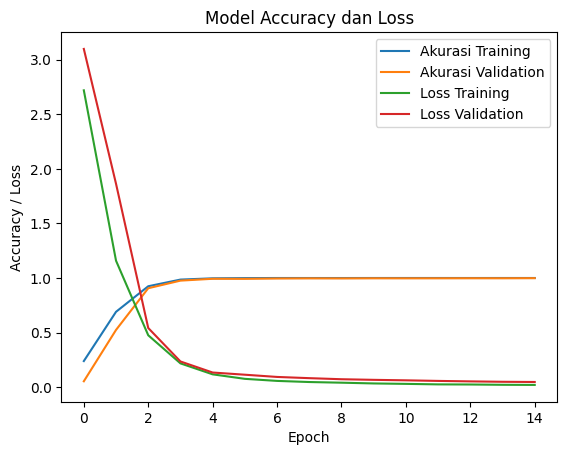

In [39]:
import matplotlib.pyplot as plt

# Plot akurasi training dan validation
plt.plot(history_v1.history["accuracy"], label="Akurasi Training")
plt.plot(history_v1.history["val_accuracy"], label="Akurasi Validation")

# Plot loss training dan validation
plt.plot(history_v1.history["loss"], label="Loss Training")
plt.plot(history_v1.history["val_loss"], label="Loss Validation")

# Label dan judul plot
plt.title("Model Accuracy dan Loss")
plt.xlabel("Epoch")
plt.ylabel("Accuracy / Loss")
plt.legend()

# Tampilkan plot
plt.show()

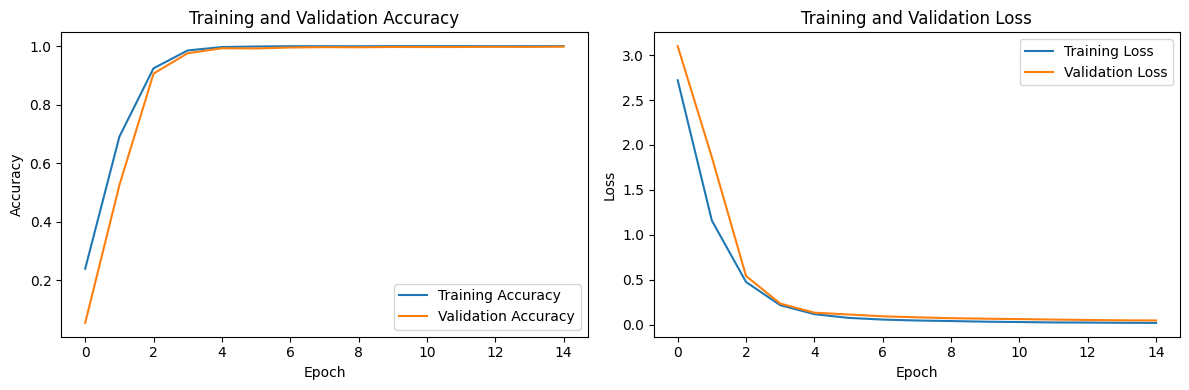

In [40]:
# Menampilkan grafik training dan validation accuracy
import matplotlib.pyplot as plt

acc = history_v1.history['accuracy']
val_acc = history_v1.history['val_accuracy']

loss = history_v1.history['loss']

val_loss = history_v1.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [41]:
# Evaluasi model menggunakan data uji
loss, acc = model.evaluate(X_test, y_test)

# Print hasil evaluasi
print("Loss:", loss)
print("Accuracy:", acc)

122/122 ━━━━━━━━━━━━━━━━━━━━ 40s 330ms/step - accuracy: 0.9994 - loss: 0.0467
Loss: 0.046872884035110474
Accuracy: 0.9984615445137024


In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score
from sklearn import metrics


# Prediksi menggunakan model pada data uji
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Hitung dan tampilkan classification report
report = metrics.classification_report(y_true_classes, y_pred_classes, target_names=AKSARA)
print(report)

# Accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
print("Precision:", precision)

# Recall
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
print("Recall:", recall)

# F1-score
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
print("F1-score:", f1)

# Log Loss
logloss = log_loss(y_test, y_pred)
print("Log Loss:", logloss)

122/122 ━━━━━━━━━━━━━━━━━━━━ 41s 336ms/step
              precision    recall  f1-score   support

          Ba       0.99      1.00      0.99       195
          Ca       1.00      1.00      1.00       202
          Da       0.99      1.00      1.00       188
         Dha       1.00      1.00      1.00       187
          Ga       1.00      1.00      1.00       203
          Ha       1.00      0.99      1.00       213
          Ja       1.00      1.00      1.00       207
          Ka       1.00      1.00      1.00       182
          La       1.00      1.00      1.00       182
          Ma       1.00      1.00      1.00       209
          Na       1.00      1.00      1.00       168
         Nga       0.99      1.00      1.00       188
         Nya       1.00      1.00      1.00       199
          Pa       1.00      1.00      1.00       225
          Ra       1.00      1.00      1.00       180
          Sa       1.00      1.00      1.00       202
          Ta       1.00      1.00    

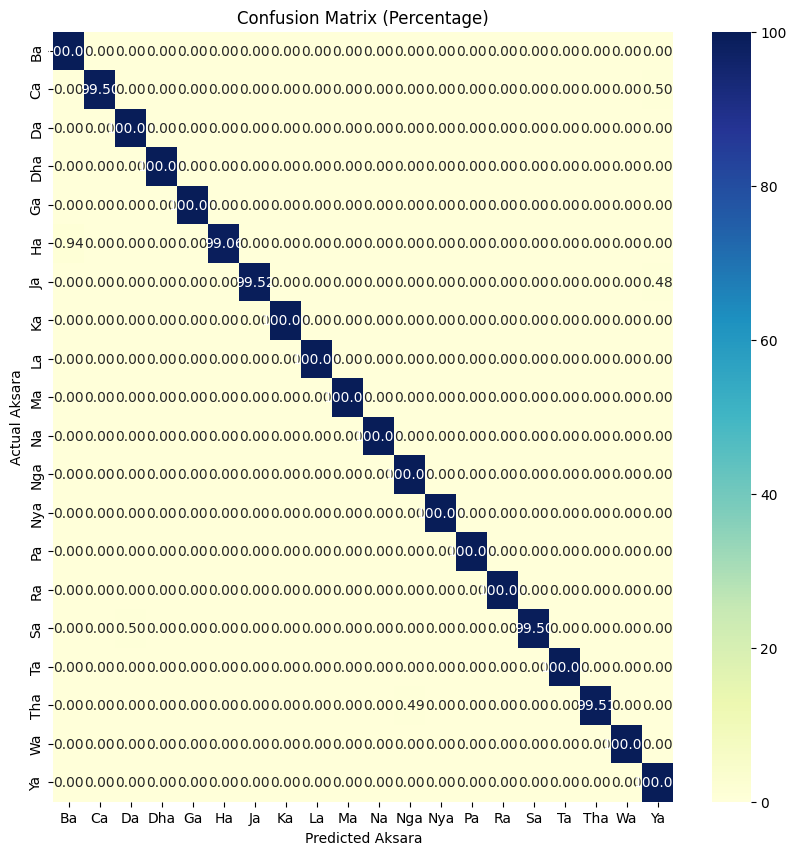

In [43]:
# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Hitung total sampel untuk setiap kelas aktual
total_per_class = np.sum(cm, axis=1)

# Konversi setiap elemen dalam confusion matrix menjadi persentase
cm_percent = (cm.astype('float') / total_per_class[:, np.newaxis]) * 100

# Display Confusion Matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=AKSARA, yticklabels=AKSARA)
plt.xlabel("Predicted Aksara")
plt.ylabel("Actual Aksara")
plt.title("Confusion Matrix (Percentage)")
plt.show()

In [28]:
# from sklearn.metrics import roc_curve, auc, roc_auc_score
# import matplotlib.pyplot as plt

# # Make predictions
# y_pred = model.predict(X_test)

# # Compute ROC curve and ROC AUC for each class
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(8):
#     fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# # Compute micro-average ROC curve and ROC AUC score
# fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
# roc_auc["micro"] = roc_auc_score(y_test, y_pred, multi_class='ovr')

# # Plot the ROC curves for each class and the micro-average ROC curve
# plt.figure(figsize=(8, 6))
# lw = 2
# plt.plot(fpr["micro"], tpr["micro"], lw=lw, label='micro-average ROC curve (AUC = {0:0.2f})'
#                                                    ''.format(roc_auc["micro"]))
# colors = ['cornflowerblue', 'darkorange', 'forestgreen', 'red', 'purple', 'gray', 'black', 'pink']
# for i, color in zip(range(8), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#              label='ROC curve of {0} (AUC = {1:0.2f})'.format(aksara_categories[i], roc_auc[i]))
    
# plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate', fontsize=14)
# plt.ylabel('True Positive Rate', fontsize=14)
# plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
# plt.legend(loc="lower right", fontsize=12)
# plt.show()

In [29]:
# from sklearn.metrics import classification_report, accuracy_score,roc_curve,confusion_matrix

# y_test_int = np.argmax(y_test, axis=1)
# y_pred = model.predict(X_test)
# y_pred_int = np.argmax(y_pred, axis=1)

# print(classification_report(y_test_int, y_pred_int))

In [30]:
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix

# plt.figure(figsize=(10, 10))
# cm = confusion_matrix(y_test_int, y_pred_int)

# # Hitung total sampel untuk setiap kelas aktual
# total_per_class = np.sum(cm, axis=1)

# # Konversi setiap elemen dalam confusion matrix menjadi persentase
# cm_percent = (cm.astype('float') / total_per_class[:, np.newaxis]) * 100

# # Gunakan label langsung dari variabel Aksara
# emotions_labels = aksara_categories

# sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=emotions_labels, yticklabels=emotions_labels)
# plt.xlabel("Predicted Emotions")
# plt.ylabel("Actual Emotions")
# plt.title("Confusion Matrix (Percentage)")
# plt.show()

## Model 2 - ovt

In [44]:
# import tensorflow as tf
# from tensorflow.keras.utils import plot_model

# from tensorflow.keras.applications import VGG16

# vgg16 = tf.keras.applications.VGG16(
#     input_shape=(128, 128, 3),
#     pooling=max,
#     include_top=False,
#     weights="imagenet")
# vgg16.summary()

In [49]:
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import layers, initializers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

# Initialize Sequential model
model = Sequential()

# Add VGG16 as a layer
# model.add(vgg16)

# model = models.Sequential()

# Block 1
# model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001), input_shape=input_shape))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
# model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3)))
# model.add(Dropout(0.75))

# Block 2
# model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
# model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.75))

# Block 3
# model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
# model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
# model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.75))

# Block 4
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.75))

# Block 5
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.75))

# Flatten
model.add(Flatten())

# Dense layers
# model.add(Dense(512, activation='relu', kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.0001, seed=None)))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.75))

# model.add(Dense(512, activation='relu', kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.0001, seed=None)))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.75))

# Output layer
model.add(Dense(20, activation='softmax'))

# Adam optimizer with learning rate scheduling, Weight Decay, and Gradient Clipping
# opt = Adam(learning_rate=0.0001, weight_decay=1e-4, clipvalue=0.0001)
opt = tf.keras.optimizers.SGD(learning_rate=0.0001, weight_decay=1e-4, clipvalue=0.0001)
    
# Compile the model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_52 (Conv2D)              │ (None, 128, 128, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_60          │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_61          │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 42, 42, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 42, 42, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_62          │ (None, 42, 42, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 42, 42, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_63          │ (None, 42, 42, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 21, 21, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 21, 21, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_64          │ (None, 21, 21, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 21, 21, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_65          │ (None, 21, 21, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 21, 21, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_66          │ (None, 21, 21, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 10, 10, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_67          │ (None, 10, 10, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 10, 10, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_68          │ (None, 10, 10, 512)    │         2,04

 Total params: 15,291,988 (58.33 MB)

 Trainable params: 15,282,772 (58.30 MB)

 Non-trainable params: 9,216 (36.00 KB)

In [50]:
history_v2 = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 474s 3s/step - accuracy: 0.0533 - loss: 3.7601 - val_accuracy: 0.0705 - val_loss: 3.3810
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 469s 3s/step - accuracy: 0.0545 - loss: 3.7709 - val_accuracy: 0.0577 - val_loss: 3.4836
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 488s 3s/step - accuracy: 0.0511 - loss: 3.7609 - val_accuracy: 0.0485 - val_loss: 3.6266
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 846s 6s/step - accuracy: 0.0525 - loss: 3.7796 - val_accuracy: 0.0500 - val_loss: 3.7271
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 907s 6s/step - accuracy: 0.0506 - loss: 3.7612 - val_accuracy: 0.0554 - val_loss: 3.7554
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 911s 6s/step - accuracy: 0.0510 - loss: 3.7441 - val_accuracy: 0.0577 - val_loss: 3.7578
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 905s 6s/step - accuracy: 0.0535 - loss: 3.7191 - val_accuracy: 0.0582 - val_loss: 3.7590
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 918s 6s/step - accuracy: 0.0526 - loss: 3.7351 - val_accu

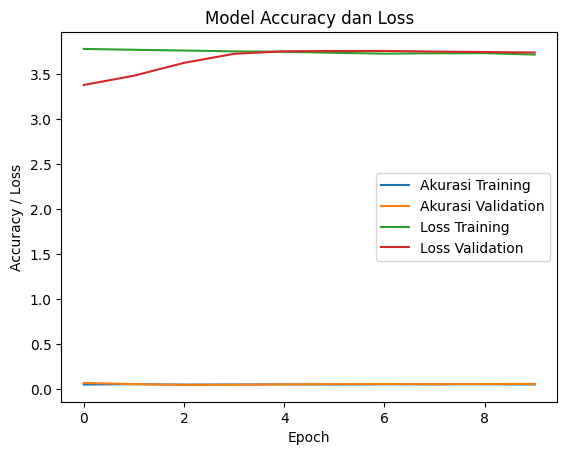

In [51]:
import matplotlib.pyplot as plt

# Plot akurasi training dan validation
plt.plot(history_v2.history["accuracy"], label="Akurasi Training")
plt.plot(history_v2.history["val_accuracy"], label="Akurasi Validation")

# Plot loss training dan validation
plt.plot(history_v2.history["loss"], label="Loss Training")
plt.plot(history_v2.history["val_loss"], label="Loss Validation")

# Label dan judul plot
plt.title("Model Accuracy dan Loss")
plt.xlabel("Epoch")
plt.ylabel("Accuracy / Loss")
plt.legend()

# Tampilkan plot
plt.show()

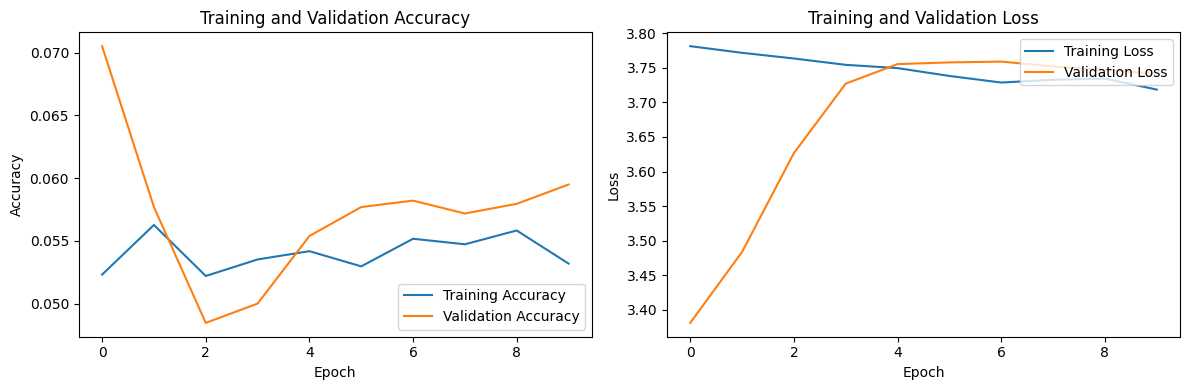

In [53]:
# Menampilkan grafik training dan validation accuracy
import matplotlib.pyplot as plt

acc = history_v2.history['accuracy']
val_acc = history_v2.history['val_accuracy']

loss = history_v2.history['loss']

val_loss = history_v2.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [54]:
# Evaluasi model menggunakan data uji
loss, acc = model.evaluate(X_test, y_test)

# Print hasil evaluasi
print("Loss:", loss)
print("Accuracy:", acc)

122/122 ━━━━━━━━━━━━━━━━━━━━ 95s 775ms/step - accuracy: 0.0591 - loss: 3.7580
Loss: 3.7415435314178467
Accuracy: 0.059487178921699524


In [55]:
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score
from sklearn import metrics


# Prediksi menggunakan model pada data uji
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Hitung dan tampilkan classification report
report = metrics.classification_report(y_true_classes, y_pred_classes, target_names=AKSARA)
print(report)

# Accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
print("Precision:", precision)

# Recall
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
print("Recall:", recall)

# F1-score
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
print("F1-score:", f1)

# Log Loss
logloss = log_loss(y_test, y_pred)
print("Log Loss:", logloss)

122/122 ━━━━━━━━━━━━━━━━━━━━ 96s 773ms/step
              precision    recall  f1-score   support

          Ba       0.02      0.02      0.02       195
          Ca       0.05      0.05      0.05       202
          Da       0.05      0.07      0.06       188
         Dha       0.05      0.04      0.04       187
          Ga       0.09      0.08      0.09       203
          Ha       0.05      0.04      0.05       213
          Ja       0.12      0.12      0.12       207
          Ka       0.03      0.03      0.03       182
          La       0.06      0.09      0.07       182
          Ma       0.05      0.04      0.05       209
          Na       0.11      0.14      0.13       168
         Nga       0.06      0.06      0.06       188
         Nya       0.02      0.02      0.02       199
          Pa       0.05      0.04      0.04       225
          Ra       0.03      0.02      0.02       180
          Sa       0.05      0.05      0.05       202
          Ta       0.06      0.07    

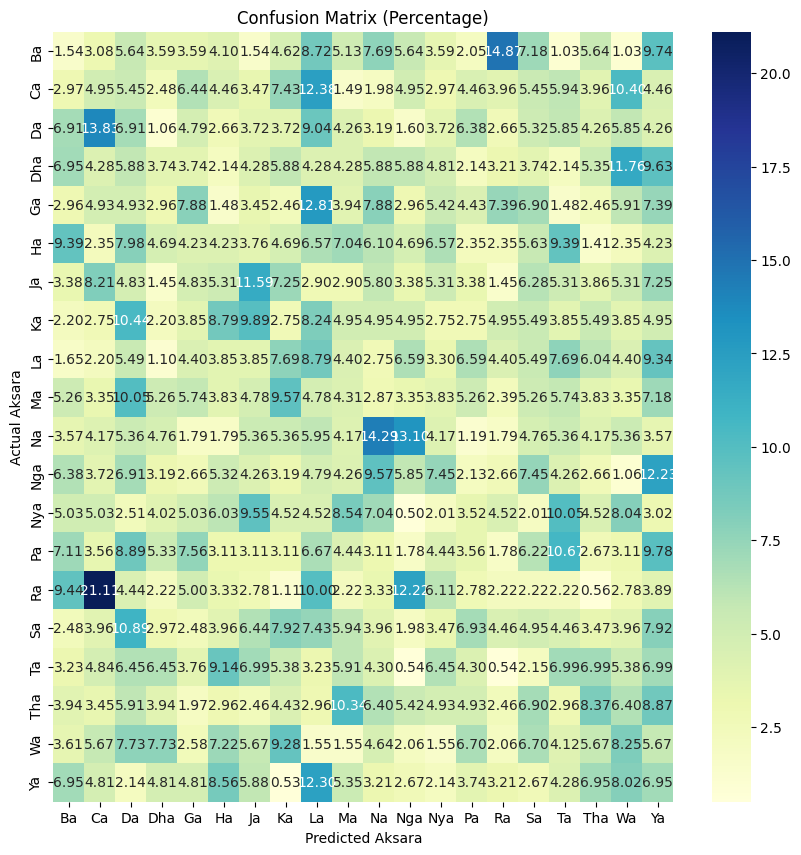

In [56]:
# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Hitung total sampel untuk setiap kelas aktual
total_per_class = np.sum(cm, axis=1)

# Konversi setiap elemen dalam confusion matrix menjadi persentase
cm_percent = (cm.astype('float') / total_per_class[:, np.newaxis]) * 100

# Display Confusion Matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=AKSARA, yticklabels=AKSARA)
plt.xlabel("Predicted Aksara")
plt.ylabel("Actual Aksara")
plt.title("Confusion Matrix (Percentage)")
plt.show()